# Hoja 3:

## Ejercicio 1:

In [78]:
import numpy as np
import matplotlib.pyplot as plt

def julia(F, c_param, a, b, c, d, r, n):

    re = np.linspace(a, b, r)
    im = np.linspace(c, d, r)
    Z0 = re[np.newaxis, :] + 1j * im[:, np.newaxis]
    Z = Z0.copy()

    R = max(2.0, abs(c_param) + 1)

    mask = np.ones_like(Z, dtype=bool)
    for _ in range(n):
        Z[mask] = F(Z[mask], c_param)
        mask &= (np.abs(Z) <= R)

    plt.figure(figsize=(6,6))
    plt.imshow(mask, extent=[a, b, c, d], origin='lower', cmap='turbo', interpolation='nearest')
    plt.axis('equal')
    plt.show()


def julia_cuadratica(c_param, a, b, c, d, r, n):
    return julia(lambda z,c: z*z + c, c_param, a, b, c, d, r, n)

def julia_logistica(c_param, a, b, c, d, r, n):
    return julia(lambda z,c: c*z*(1-z), c_param, a, b, c, d, r, n)

def julia_cubica(c_param, a, b, c, d, r, n):
    return julia(lambda z,c: z**3 + c, c_param, a, b, c, d, r, n)


## Ejercicio 2:

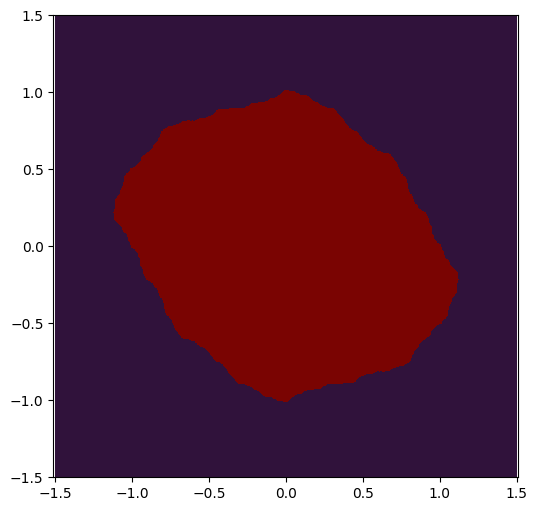

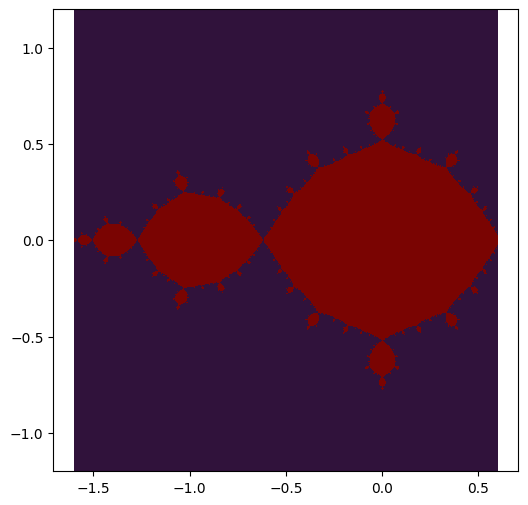

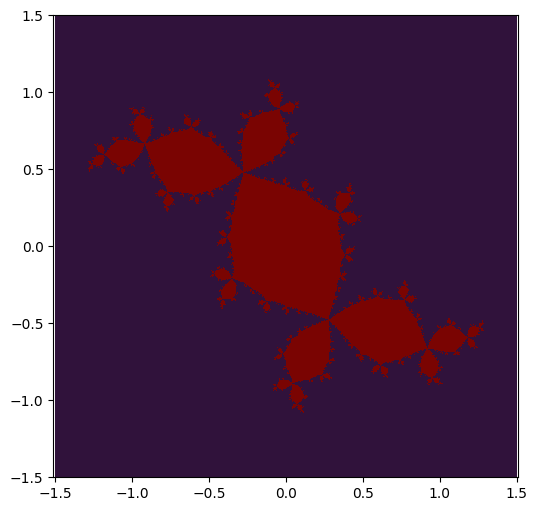

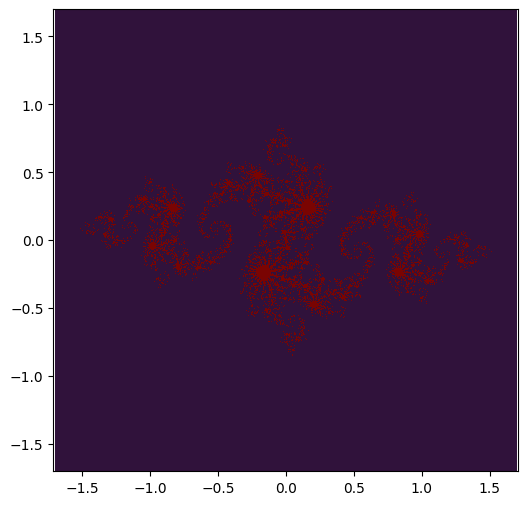

In [79]:
julia_cuadratica(-0.1 + 0.2j, a=-1.5, b=1.5, c=-1.5, d=1.5, r=900, n=250)

julia_cuadratica(-1, a=-1.6, b=0.6, c=-1.2, d=1.2, r=1100, n=350)

julia_cuadratica(-0.123 + 0.745j, a=-1.5, b=1.5, c=-1.5, d=1.5, r=1000, n=350)

julia_cuadratica(-0.8 + 0.156j, a=-1.7, b=1.7, c=-1.7, d=1.7, r=1000, n=200)

## Ejercicio 3:

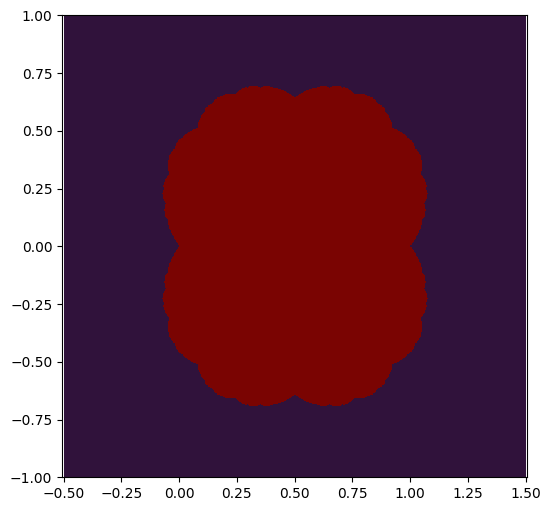

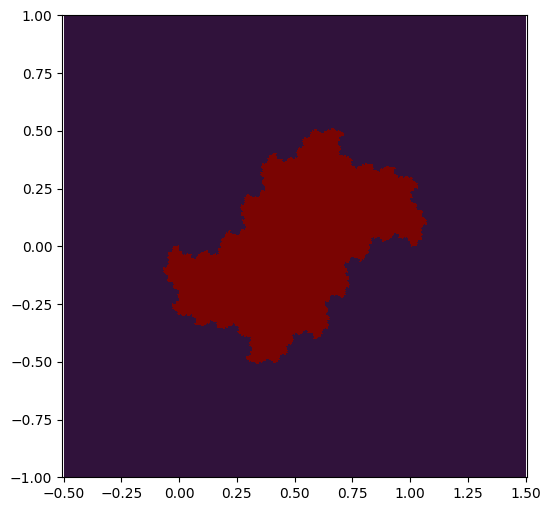

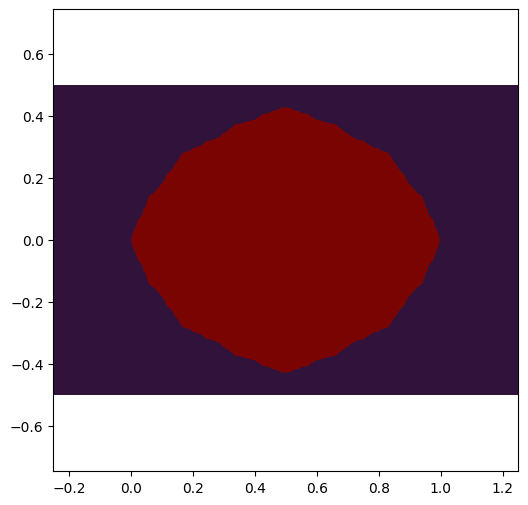

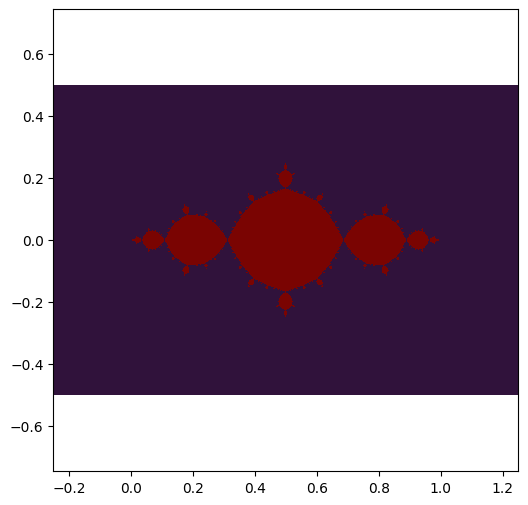

In [80]:
julia_logistica(1.5, a=-0.5, b=1.5, c=-1, d=1, r=900, n=250)

julia_logistica(1.90 + 0.88j, a=-0.5, b=1.5, c=-1, d=1, r=1000, n=300)

julia_logistica(2.3, a=-0.25, b=1.25, c=-0.5, d=0.5, r=1100, n=350)

julia_logistica(3.2, a=-0.25, b=1.25, c=-0.5, d=0.5, r=1200, n=250)

## Ejercicio 4:

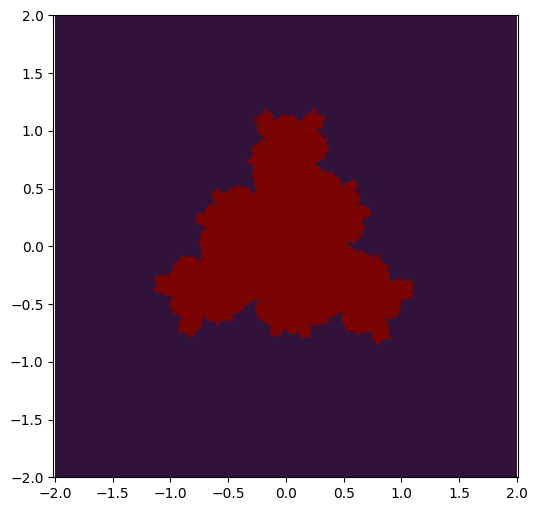

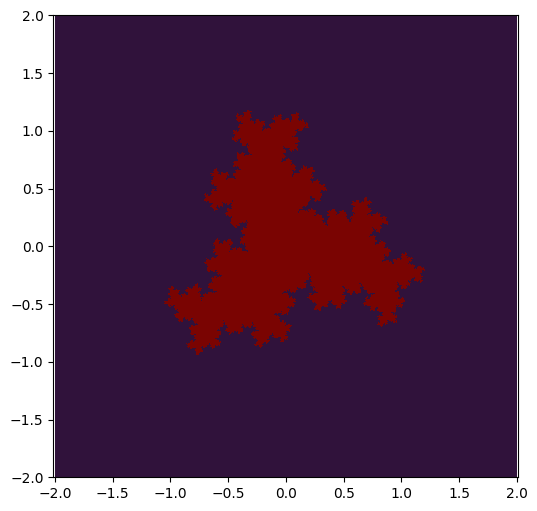

In [81]:
julia_cubica(0.1 + 0.7j, a=-2, b=2, c=-2, d=2, r=900, n=300)

julia_cubica(-0.4 + 0.6j, a=-2, b=2, c=-2, d=2, r=1000, n=350)

## Ejercicio 5:

Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


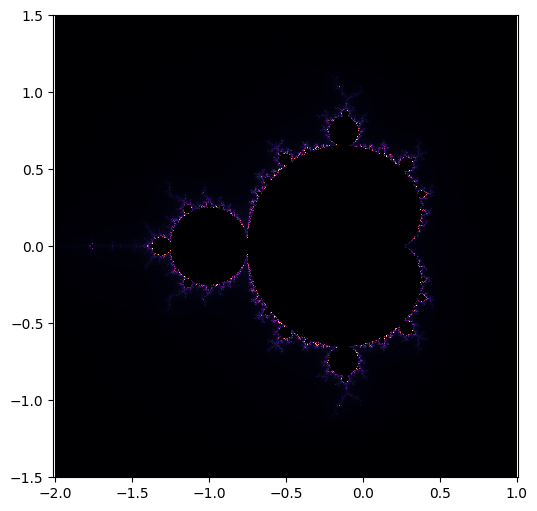

Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


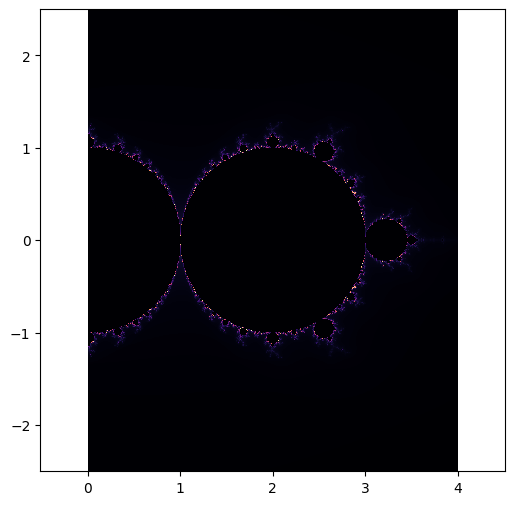

Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


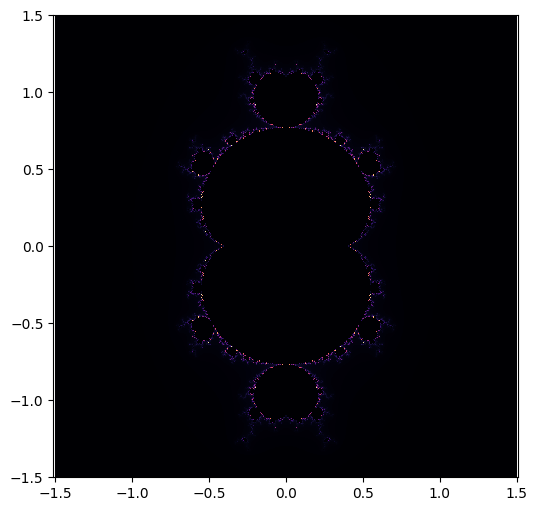

In [90]:
import numpy as np
import matplotlib.pyplot as plt

def mandelbrot(F, z0, a, b, c, d, r, n):

    R = 2
    Re = np.linspace(a,  b,  r)
    Im = np.linspace(c, d, r)
    C = Re[np.newaxis,:] + 1j * Im[:, np.newaxis]
    Z = np.full_like(C, z0)

    mask = np.ones_like(C, dtype=bool)
    escape_count = np.zeros_like(C, dtype=int)

    for k in range(n):
        Z[mask] = F(Z[mask], C[mask])
        mask &= (np.abs(Z) <= R)
        escape_count[~mask & (escape_count==0)] = k
        if not mask.any(): break

    plt.figure(figsize=(6,6))
    plt.imshow(escape_count, origin='lower', extent=[a,b,c,d], cmap='magma', interpolation='nearest')
    plt.axis('equal'); 
    plt.axis([a,b,c,d])
    plt.show()

def mandelbrot_cuadratica(a, b, c, d, r, n):
    return mandelbrot(lambda z,c: z*z + c, 0, a, b, c, d, r, n)

def mandelbrot_logistica(a, b, c, d, r, n):
    return mandelbrot(lambda z,c: c*z*(1-z), 0.5, a, b, c, d, r, n)

def mandelbrot_cubica(a, b, c, d, r, n):
    return mandelbrot(lambda z,c: z**3 + c, 0, a, b, c, d, r, n)


mandelbrot_cuadratica(a=-2.0, b=1.0, c=-1.5, d=1.5, r=1200, n=300)

mandelbrot_logistica(a=0, b=4.0, c=-2.5, d=2.5, r=1200, n=300)

mandelbrot_cubica(a=-1.5, b=1.5, c=-1.5, d=1.5, r=1200, n=300)